# Measure the computing performance (time, memory) of the model of septoria

## Benchmark for various numbers of plants, phyto-elements by leaf, initial number of lesions by leaf

In [44]:
import matplotlib.pyplot as plt


In [45]:
%load_ext rmagic
import pandas as pd
df = pd.DataFrame.from_csv('bench_mem.txt',sep=',',index_col=None)

The rmagic extension is already loaded. To reload it, use:
  %reload_ext rmagic


In [46]:
import pandas.rpy.common as com
r_df = com.convert_to_r_dataframe(df)

Residual Standard Error=49.0393
R-Square=0.4722
F-statistic (df=1, 18)=16.1035
p-value=8e-04

          Estimate Std.Err t-value Pr(>|t|)
Intercept   8.7206 24.6917  0.3532   0.7281
X          52.2227 13.0137  4.0129   0.0008





Call:
lm(formula = memory ~ plant + lesion:plant, data = r_df)

Residuals:
   Min     1Q Median     3Q    Max 
-40.37 -32.82  -1.02  23.07  86.54 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    25.099     18.347   1.368 0.189112    
plant          23.932     11.651   2.054 0.055669 .  
plant:lesion    6.041      1.457   4.146 0.000676 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 35.58 on 17 degrees of freedom
Multiple R-squared:  0.7375,	Adjusted R-squared:  0.7067 
F-statistic: 23.89 on 2 and 17 DF,  p-value: 1.153e-05



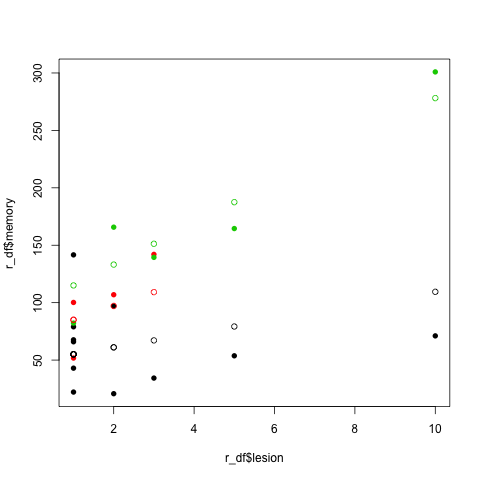

In [47]:
%Rpush r_df
%R ls.print(lsfit(r_df$plant,r_df$memory))
%R fit = lm(memory~plant+lesion:plant,data=r_df)
%R print(summary.lm(fit))
%R plot(r_df$lesion, r_df$memory,col=r_df$plant,pch=16);points(r_df$lesion,predict(fit),col=r_df$plant)
#%R lapply(split(r_df,r_df$plant),function(x) lines(x$lesion,predict(fit,x$lesion)))

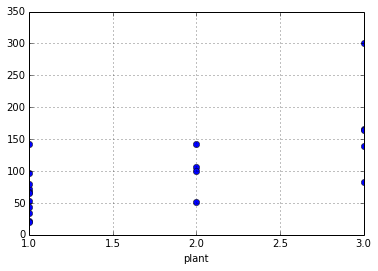

In [48]:
%matplotlib inline
df.plot(y='memory', x='plant',style='o')

In [49]:
df=df.sort(['plant','lesion'])

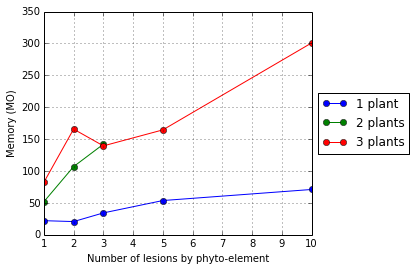

In [51]:
plt.figure()
#dfp = (df[df.phytomer==1& (df.plant <=5)]).groupby('plant')
dfp = (df[df.phytomer==1]).groupby('plant')

axes = dfp.plot(y='memory', x='lesion', kind='line',style='o-')
ax=axes[1]
ax.set_xlabel('Number of lesions by phyto-element ')
ax.set_ylabel('Memory (MO)')
#ax.set_xticks([1, 2, 3, 4, 5])
patches, labels = ax.get_legend_handles_labels()
indices = axes.axes[0].tolist()

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(patches, ['%d plant'%i if i == 1 else '%d plants'%i for i in indices],
          loc='center left', bbox_to_anchor=(1, 0.5))


#df.groupby('plant').plot(y='time', x='lesion', kind='line',style='o-')

#plt.legend(loc='best')
#df.groupby('phytomer').plot(y='time', x='plant')
#df.plot(y='time', x='plant', kind='scatter')

In [52]:
ax.figure.savefig('benchmark_mem.png', dpi=300)

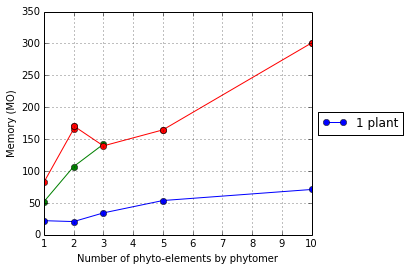

In [38]:
axes=(df[(df.phytomer==1)]).groupby('plant').plot(y='memory', x='lesion',style='o-')
ax=axes[1]
ax.set_xlabel('Number of phyto-elements by phytomer ')
ax.set_ylabel('Memory (MO)')

patches, labels = ax.get_legend_handles_labels()
#indices = ax.tolist()

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(patches, ['1 plant'],
          loc='center left', bbox_to_anchor=(1, 0.5))
#ax.figure.savefig('benchmark2_mem.png', dpi=300)
#(df).groupby('plant').plot(y='time', x='phytomer')

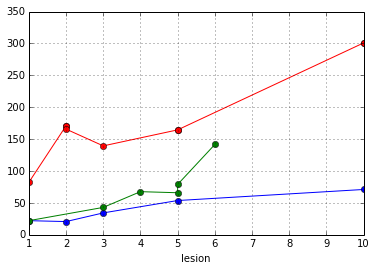

In [41]:
df=df.sort('lesion')
(df[(df.phytomer==1)&(df.plant==1)]).plot(y='memory', x='lesion',style='o-')
df=df.sort('phytomer')
(df[(df.lesion==1)&(df.plant==1)]).plot(y='memory', x='phytomer',style='o-')
df=df.sort('lesion')
(df[(df.phytomer==1)&(df.plant==3)]).plot(y='memory', x='lesion',style='o-')

In [43]:
df.sort(['plant', 'phytomer', 'lesion'])

plant  phytomer  lesion      memory
3       1         1       1   22.158043
4       1         1       2   20.740280
5       1         1       3   34.332779
0       1         1       5   53.732018
1       1         1      10   71.079529
6       1         3       1   42.966125
7       1         3       2   97.058357
21      1         4       1   67.653984
22      1         5       1   65.941483
2       1         5       1   78.974052
23      1         6       1  141.615456
8       2         1       1   51.774010
9       2         1       2  106.913963
10      2         1       3  142.037949
11      2         3       1  100.186493
12      3         1       1   82.199097
18      3         1       2  170.852127
15      3         1       2  170.852127
13      3         1       2  165.731133
14      3         1       3  139.438622
16      3         1       5  164.532158
19      3         1       5  164.532158
17      3         1      10  300.918663
20      3         1      10  300.918663

[24 rows x 4 columns]